In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


\textbf(https://github.com/kunalchand/CSE587-DIC-Project)

In [1]:
import tensorflow as tf
from tf_agents.networks import actor_distribution_network
from tf_agents.environments import suite_gym
from tf_agents.specs import tensor_spec
from tf_agents.trajectories import time_step as ts
from tf_agents.utils import common

ModuleNotFoundError: ignored

# DOWNLOAD REQUISITE LIBRARIES AND DATASET

In this section the requisite libraries and

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, LabelBinarizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
amazon_data = []
with gzip.open('/content/gdrive/MyDrive/Colab_data/Video_Games.json.gz') as f:
    for l in f:
        amazon_data.append(json.loads(l.strip()))


In [ ]:
amazon_meta_data = []
with gzip.open('/content/gdrive/MyDrive/Colab_data/meta_Video_Games.json.gz') as f:
    for l in f:
        amazon_meta_data.append(json.loads(l.strip()))


**# DATA PROCESSING ON META DATA**

# The following Data cleaning and processing steps were undertaken over the meta-dataset.

# 1. CONVERTING META-DATASET TO DATAFRAME.

In [ ]:
amazon_meta_df = pd.DataFrame (amazon_meta_data)


In [ ]:
amazon_meta_df.shape

(84819, 19)

In [ ]:
amazon_meta_df.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


# 2. LISTING THE FEATURES, DATATYPES OF FEATURES AND THE NUMBER OF NAN VALUES IN EACH COLUMN OF THE DATAFRAME

In [ ]:
for col in amazon_meta_df.columns:
    print(col)

category
tech1
description
fit
title
also_buy
tech2
brand
feature
rank
also_view
main_cat
similar_item
date
price
asin
imageURL
imageURLHighRes
details


In [ ]:
amazon_meta_df.isnull().sum(axis = 0)

category             0
tech1                0
description          0
fit                  0
title                0
also_buy             0
tech2                0
brand                0
feature              0
rank                 0
also_view            0
main_cat             0
similar_item         0
date                 0
price                0
asin                 0
imageURL             0
imageURLHighRes      0
details            107
dtype: int64

In [ ]:
amazon_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84819 entries, 0 to 84818
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         84819 non-null  object
 1   tech1            84819 non-null  object
 2   description      84819 non-null  object
 3   fit              84819 non-null  object
 4   title            84819 non-null  object
 5   also_buy         84819 non-null  object
 6   tech2            84819 non-null  object
 7   brand            84819 non-null  object
 8   feature          84819 non-null  object
 9   rank             84819 non-null  object
 10  also_view        84819 non-null  object
 11  main_cat         84819 non-null  object
 12  similar_item     84819 non-null  object
 13  date             84819 non-null  object
 14  price            84819 non-null  object
 15  asin             84819 non-null  object
 16  imageURL         84819 non-null  object
 17  imageURLHighRes  84819 non-null

**# DATA PROCESSING AND CLEANING ON THE REVIEWS DATASET**
# THE FOLLOWING DATA PROCESSING AND CLEANING STEPS WERE UNDERTAKEN ON THE REVIEWS DATASET
# 3. CONVERT REVIEWS DATASET TO DATAFRAME

In [ ]:
amazon_df = pd.DataFrame (amazon_data)
amazon_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


In [ ]:
amazon_df.shape

(2565349, 12)

# 4. MERGING THE META-DATAFRAME AND REVIEWS DATAFRAME AT PIVOT POINT 'ASIN'

In [ ]:
merged_df = pd.merge(amazon_df,amazon_meta_df,on='asin',how='left')

# 5. LISTING THE FEATURES, DATATYPES OF FEATURES AND THE NUMBER OF NAN VALUES IN EACH COLUMN OF THE MERGED DATAFRAME

In [ ]:
for col in merged_df.columns:
    print(col)

overall
verified
reviewTime
reviewerID
asin
reviewerName
reviewText
summary
unixReviewTime
vote
style
image
category
tech1
description
fit
title
also_buy
tech2
brand
feature
rank
also_view
main_cat
similar_item
date
price
imageURL
imageURLHighRes
details


In [ ]:
merged_df.dtypes

overall            float64
verified              bool
reviewTime          object
reviewerID          object
asin                object
reviewerName        object
reviewText          object
summary             object
unixReviewTime       int64
vote                object
style               object
image               object
category            object
tech1               object
description         object
fit                 object
title               object
also_buy            object
tech2               object
brand               object
feature             object
rank                object
also_view           object
main_cat            object
similar_item        object
date                object
price               object
imageURL            object
imageURLHighRes     object
details             object
dtype: object

In [ ]:
merged_df.isna().sum(axis = 0)

overall                  0
verified                 0
reviewTime               0
reviewerID               0
asin                     0
reviewerName           266
reviewText            1811
summary                876
unixReviewTime           0
vote               2321139
style              1438548
image              2818599
category              3676
tech1                 3676
description           3676
fit                   3676
title                 3676
also_buy              3676
tech2                 3676
brand                 3676
feature               3676
rank                  3676
also_view             3676
main_cat              3676
similar_item          3676
date                  3676
price                 3676
imageURL              3676
imageURLHighRes       3676
details               4876
dtype: int64

# 6. DROPPING COLUMNS WHICH HAVE MAJORITY OF NULL VALUES AND THOSE THAT WOULD ADD NO ADDITIONAL ADVANTAGE TO OUT MODEL AND DROPPING ALL ROWS THAT HAVE NAN VALUES IN AT LEAST ONE COLUMN

In [ ]:
merged_df.drop(['vote', 'style','image','tech1','also_buy','tech2', 'date', 'imageURL','imageURLHighRes', 'details' ], axis=1, inplace=True)

In [ ]:
merged_df.shape

(2848245, 20)

In [ ]:
merged_df.isna().sum(axis = 0)

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
reviewerName       266
reviewText        1811
summary            876
unixReviewTime       0
category          3676
description       3676
fit               3676
title             3676
brand             3676
feature           3676
rank              3676
also_view         3676
main_cat          3676
similar_item      3676
price             3676
dtype: int64

In [ ]:
merged_df = merged_df.dropna(subset=merged_df.columns.values)

In [ ]:
merged_df.isna().sum(axis = 0)

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
category          0
description       0
fit               0
title             0
brand             0
feature           0
rank              0
also_view         0
main_cat          0
similar_item      0
price             0
dtype: int64

In [ ]:
merged_df.shape

(2841688, 20)

# 7.  OBSERVING THE TOTAL NUMBER OF UNIQUE PRODUCT IDS REVIEWED IN THE DATASET AND RENAMING MULTIPLE COLUMNS, CHANGING DATA TYPE OF DATE COLUMN AND PRICE COLUMN,OBSERVING SOME INFORMATION PERTAINING TO DATES AND RATINGS.


In [ ]:
merged_df.rename({'overall':'rating', 'asin':'product_id', 'reviewTime':'date', 'unixReviewTime': 'timestamp'}, axis=1, inplace=True)

In [ ]:
merged_df.shape

(2841688, 20)

In [ ]:
merged_df['product_id'].nunique()

71878

In [ ]:
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%m %d, %Y')

In [ ]:
merged_df['Year'] = pd.DatetimeIndex(merged_df['date']).year
merged_df = merged_df.sort_values(by=['Year'],ascending=False)

In [ ]:
print("Total number of entries in dataset: ",len(merged_df.axes[0]))
print("Total number of categories in dataset: ", len(merged_df.axes[1]))

Total number of entries in dataset:  2841688
Total number of categories in dataset:  21


In [ ]:
print("Date of first review ever made: ", merged_df['date'].min())
print("Date of latest review: ",merged_df['date'].max())

Date of first review ever made:  1997-11-08 00:00:00
Date of latest review:  2018-10-02 00:00:00


In [ ]:
merged_df['rating'] = merged_df['rating'].astype('int32')
print("Minimum rated product: " , merged_df['rating'].min())
print("Maximum rated product: " , merged_df['rating'].max())

Minimum rated product:  1
Maximum rated product:  5


# 8. OBSERVING THE PRICE COLUMN IN MERGED DATAFRAME AND TAKING ACTION

In [ ]:
merged_df.head(5)

,rating,verified,date,reviewerID,product_id,reviewerName,reviewText,summary,timestamp,category,...,fit,title,brand,feature,rank,also_view,main_cat,similar_item,price,Year
2848244,5,True,2018-04-19,A194UPGR3OXZB7,B01HJEBIAA,Kayla,Haven't really used it too much but dang this ...,Gorgeous and durable!,1524096000,"[Video Games, PC, Accessories, Gaming Mice]",...,,Zelotes 4000 DPI Programmable Gaming Mouse for...,Zelotes,"[Customize DPI Switch: 1000/1500/2000/4000,the...",[>#434 in Computers & Accessories > Computer A...,"[B016ZF77OA, B00GU8W5AE, B00E64DTDQ, B074TF6XV...",Computers,,$23.99,2018
2565045,5,True,2018-03-28,A36J7O2U32J599,B000PS2XES,Ron S.,awsome!,Five Stars,1522195200,"[Video Games, PC, Games, </span></span></span>]",...,,The Orange Box - PC,by\n \n Valve,[Characters - Advanced facial animation system...,"[>#22,881 in Video Games (See Top 100 in Video...","[B00140S21O, B000RO0OKU, B00006I02Z, B004IEA4Q...",Video Games,,\n\t\t ...,2018
2565091,5,True,2018-04-19,A29I1A248GMTQN,B000PT18OS,L.W,was great nproduct,Five Stars,1524096000,"[Video Games, Xbox 360, Accessories, Cables & ...",...,,Microsoft Original Power Supply 203W AC Adapte...,HongLei,[AC Power Supply for Microsoft XBOX 360 203W O...,[>#14 in Video Games > Xbox 360 > Accessories ...,"[B0181R6WUA, B00VDHMRS2, B003WM1P5W, B005HN5LK...",Computers,,$1.54,2018
2565090,1,True,2018-05-07,A1RSZH0WIAWFNC,B000PT18OS,P,Sells USED CRACKED JUNK! BEWARE!,STAY AWAY USED/CRACKED!,1525651200,"[Video Games, Xbox 360, Accessories, Cables & ...",...,,Microsoft Original Power Supply 203W AC Adapte...,HongLei,[AC Power Supply for Microsoft XBOX 360 203W O...,[>#14 in Video Games > Xbox 360 > Accessories ...,"[B0181R6WUA, B00VDHMRS2, B003WM1P5W, B005HN5LK...",Computers,,$1.54,2018
2565073,5,True,2018-01-12,A1VYOGOZ97ZMV1,B000PS1HNQ,Cathy Whitehouse,My mom loved it,Five Stars,1515715200,"[Video Games, PC, Games, </span></span></span>]",...,,The Sims 2: Bon Voyage - PC CD-Rom (Expansion ...,by\n \n Electronic Arts,[Whisk your Sims away from their everyday rout...,"[>#5,207 in Video Games (See Top 100 in Video ...","[B000VSEF52, B001AIR1F8, B000KQQUMQ, B002OPZTH...",Video Games,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",2018


In [ ]:
merged_df.drop(['fit', 'similar_item','price'], axis=1, inplace=True)

In [ ]:
merged_df.shape

(2841688, 18)

# 9. PREPROCESSING THE TEXT DATA CONTAINED IN THE DATASET

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
merged_df['review_text'] = merged_df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)

In [ ]:
merged_df_text = merged_df.drop(['summary','reviewText'], axis = 1)

In [ ]:
merged_df['review_text'].isna().sum()

0

In [ ]:
merged_df_text.head(5)

,rating,verified,date,reviewerID,product_id,reviewerName,timestamp,category,description,title,brand,feature,rank,also_view,main_cat,Year,review_text
2848244,5,True,2018-04-19,A194UPGR3OXZB7,B01HJEBIAA,Kayla,1524096000,"[Video Games, PC, Accessories, Gaming Mice]",[<b>Features and Functions:</b> <br>Quick thum...,Zelotes 4000 DPI Programmable Gaming Mouse for...,Zelotes,"[Customize DPI Switch: 1000/1500/2000/4000,the...",[>#434 in Computers & Accessories > Computer A...,"[B016ZF77OA, B00GU8W5AE, B00E64DTDQ, B074TF6XV...",Computers,2018,Gorgeous and durable! Haven't really used it t...
2565045,5,True,2018-03-28,A36J7O2U32J599,B000PS2XES,Ron S.,1522195200,"[Video Games, PC, Games, </span></span></span>]",[The Orange Box delivers five innovative games...,The Orange Box - PC,by\n \n Valve,[Characters - Advanced facial animation system...,"[>#22,881 in Video Games (See Top 100 in Video...","[B00140S21O, B000RO0OKU, B00006I02Z, B004IEA4Q...",Video Games,2018,Five Stars awsome!
2565091,5,True,2018-04-19,A29I1A248GMTQN,B000PT18OS,L.W,1524096000,"[Video Games, Xbox 360, Accessories, Cables & ...",[Did you misplace or destroy the AC power adap...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,[AC Power Supply for Microsoft XBOX 360 203W O...,[>#14 in Video Games > Xbox 360 > Accessories ...,"[B0181R6WUA, B00VDHMRS2, B003WM1P5W, B005HN5LK...",Computers,2018,Five Stars was great nproduct
2565090,1,True,2018-05-07,A1RSZH0WIAWFNC,B000PT18OS,P,1525651200,"[Video Games, Xbox 360, Accessories, Cables & ...",[Did you misplace or destroy the AC power adap...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,[AC Power Supply for Microsoft XBOX 360 203W O...,[>#14 in Video Games > Xbox 360 > Accessories ...,"[B0181R6WUA, B00VDHMRS2, B003WM1P5W, B005HN5LK...",Computers,2018,STAY AWAY USED/CRACKED! Sells USED CRACKED JUN...
2565073,5,True,2018-01-12,A1VYOGOZ97ZMV1,B000PS1HNQ,Cathy Whitehouse,1515715200,"[Video Games, PC, Games, </span></span></span>]",[The Sims 2: Bon Voyage PC CD],The Sims 2: Bon Voyage - PC CD-Rom (Expansion ...,by\n \n Electronic Arts,[Whisk your Sims away from their everyday rout...,"[>#5,207 in Video Games (See Top 100 in Video ...","[B000VSEF52, B001AIR1F8, B000KQQUMQ, B002OPZTH...",Video Games,2018,Five Stars My mom loved it


In [ ]:
merged_df_text['review_text'][1263]

'Does what it says so far. I was hesitant to buy this memory card because of the inconsistent reviews of "my carrying case" memory cards, but this thing is working perfectly. Saves and Loads games with no problem. Sony made a fortune with their puny 8MB cards. This is the exact same dimensions, and it holds 128MB. It seems they ran out soon after I bought mine. Sorry! I would definitely recommend this company and their memory cards based on the price and mine working perfectly with every game I\'ve played so far. I\'ll update this review if the status of my card changes.\n\n*UPDATE*\nStopped working after a couple months of use. Sorry for the long delay in updating my review :^\\'

In [ ]:
merged_df_text = merged_df_text.drop_duplicates(['product_id','reviewerName'], keep = 'first')

In [ ]:
merged_df_text.shape

(2295540, 17)

In [ ]:
merged_df_text_copy = merged_df_text.copy()

In [ ]:
def polarity(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'
merged_df_text_copy["Score"] = merged_df_text_copy["rating"].map(polarity)
merged_df_text_copy.head()

,rating,verified,date,reviewerID,product_id,reviewerName,timestamp,category,description,title,brand,feature,rank,also_view,main_cat,Year,review_text,Score
2848244,5.0,True,2018-04-19,A194UPGR3OXZB7,B01HJEBIAA,Kayla,1524096000,"[Video Games, PC, Accessories, Gaming Mice]",[<b>Features and Functions:</b> <br>Quick thum...,Zelotes 4000 DPI Programmable Gaming Mouse for...,Zelotes,"[Customize DPI Switch: 1000/1500/2000/4000,the...",[>#434 in Computers & Accessories > Computer A...,"[B016ZF77OA, B00GU8W5AE, B00E64DTDQ, B074TF6XV...",Computers,2018,Gorgeous and durable! Haven't really used it t...,Positive
2565045,5.0,True,2018-03-28,A36J7O2U32J599,B000PS2XES,Ron S.,1522195200,"[Video Games, PC, Games, </span></span></span>]",[The Orange Box delivers five innovative games...,The Orange Box - PC,by\n \n Valve,[Characters - Advanced facial animation system...,"[>#22,881 in Video Games (See Top 100 in Video...","[B00140S21O, B000RO0OKU, B00006I02Z, B004IEA4Q...",Video Games,2018,Five Stars awsome!,Positive
2565091,5.0,True,2018-04-19,A29I1A248GMTQN,B000PT18OS,L.W,1524096000,"[Video Games, Xbox 360, Accessories, Cables & ...",[Did you misplace or destroy the AC power adap...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,[AC Power Supply for Microsoft XBOX 360 203W O...,[>#14 in Video Games > Xbox 360 > Accessories ...,"[B0181R6WUA, B00VDHMRS2, B003WM1P5W, B005HN5LK...",Computers,2018,Five Stars was great nproduct,Positive
2565090,1.0,True,2018-05-07,A1RSZH0WIAWFNC,B000PT18OS,P,1525651200,"[Video Games, Xbox 360, Accessories, Cables & ...",[Did you misplace or destroy the AC power adap...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,[AC Power Supply for Microsoft XBOX 360 203W O...,[>#14 in Video Games > Xbox 360 > Accessories ...,"[B0181R6WUA, B00VDHMRS2, B003WM1P5W, B005HN5LK...",Computers,2018,STAY AWAY USED/CRACKED! Sells USED CRACKED JUN...,Negative
2565073,5.0,True,2018-01-12,A1VYOGOZ97ZMV1,B000PS1HNQ,Cathy Whitehouse,1515715200,"[Video Games, PC, Games, </span></span></span>]",[The Sims 2: Bon Voyage PC CD],The Sims 2: Bon Voyage - PC CD-Rom (Expansion ...,by\n \n Electronic Arts,[Whisk your Sims away from their everyday rout...,"[>#5,207 in Video Games (See Top 100 in Video ...","[B000VSEF52, B001AIR1F8, B000KQQUMQ, B002OPZTH...",Video Games,2018,Five Stars My mom loved it,Positive


In [ ]:
merged_df_text_subset = merged_df_text.sample(n = 50000, random_state = 2)

In [ ]:
merged_df_text_subset.shape

(50000, 18)

In [ ]:
stop = stopwords.words('english') #All the stopwords in English language
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop = [words for words in stop if words not in excluding]

In [ ]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english')

In [ ]:
import re

def strip_html_tags(data):
    p = re.compile('<.*?>')

    return p.sub('',data)

strip_html_tags('<a href="foo.com" class="bar">This is too much! <b>text!</b></a><>')

'This is too much! text!'

In [ ]:
def strip_punctuations(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)
strip_punctuations("fsd*?~,,,( gdgqfuqyfuyqf)#")

'fsd gdgqfuqyfuyqf'

In [ ]:
from time import time
i=0
str1=' '
final_string=[]
all_positive_words=[]
all_negative_words=[]
s=''
t0=time()
for sent in merged_df_text_copy['review_text'].values:
    filtered_sentence=[]

    sent=strip_html_tags(sent)
    sent=strip_punctuations(sent)
    for w in sent.split():

        if((w.isalpha()) and (len(w)>2)):
            if(w.lower() not in stop):
                s=(snow.stem(w.lower())).encode('utf8')

                filtered_sentence.append(s)
                if (merged_df_text_copy['Score'].values)[i] == 'Positive':
                    all_positive_words.append(s)
                if(merged_df_text_copy['Score'].values)[i] == 'Negative':
                    all_negative_words.append(s)
            else:

                continue
        else:
            continue

    str1 = b" ".join(filtered_sentence)


    final_string.append(str1)

    i+=1

KeyboardInterrupt: ignored

# 10. REVIEWING POSITIVE AND NEGATIVE WORDS OBTAINED FROM TEXT ANALYSIS

In [ ]:
from collections import Counter
print("No. of positive words:",len(all_positive_words))
print("No. of negative words:",len(all_negative_words))
positive = Counter(all_positive_words)
print("\nMost Common postive words",positive.most_common(10))
negative = Counter(all_negative_words)
print("\nMost Common negative words",negative.most_common(10))

No. of positive words: 1590992
No. of negative words: 382916

Most Common postive words [(b'game', 66940), (b'play', 21440), (b'great', 20115), (b'not', 18195), (b'like', 16122), (b'one', 14381), (b'get', 13512), (b'good', 13469), (b'star', 12607), (b'love', 11274)]

Most Common negative words [(b'game', 13959), (b'not', 8418), (b'play', 4371), (b'one', 4148), (b'work', 4118), (b'get', 3583), (b'like', 3342), (b'time', 2604), (b'dont', 2512), (b'use', 2438)]


# EXPLORATORY DATA ANALYSIS

The following EDA steps have been undertaken:
1. Plotting Histogram on the basis of ratings (done)
2. Plot Histogram on the basis of year of review (done)
3. WORD cloud
4. scatter plot on the basis of rating and year
5. scatter plot on the basis of bad and good reviews
6. k-means clustering on the basis of review text
7. plot games in meta data on the basis of price
8. plot ratings on the basis of price [augment price to reviews dataframe]
9. scatter plot of rating on the basis of product id. (done)
10. Histogram on the basis of product

# 1. PLOT A HISTOGRAM OF RATINGS.

# The the number of products which have been rated 5 is highest at around 14.5 million. Most products got a 5 rating.

<AxesSubplot:xlabel='rating', ylabel='count'>

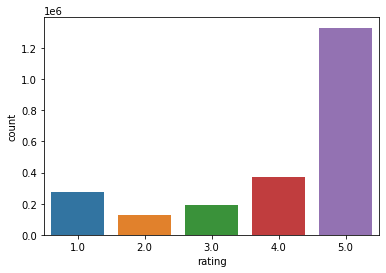

In [ ]:
sns.countplot(x='rating', data=merged_df_text)

# 2. BOXPLOT OF RATINGS

# Shows that most products were rated between 3 and 5 while few products are rated between 1 and 3

<AxesSubplot:ylabel='rating'>

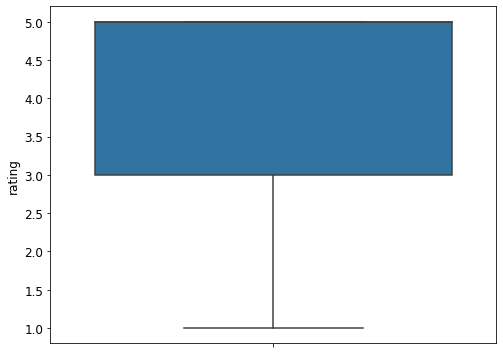

In [ ]:
sns.boxplot(y='rating',data=merged_df_text)

# 3. PIE CHART OF RATINGS

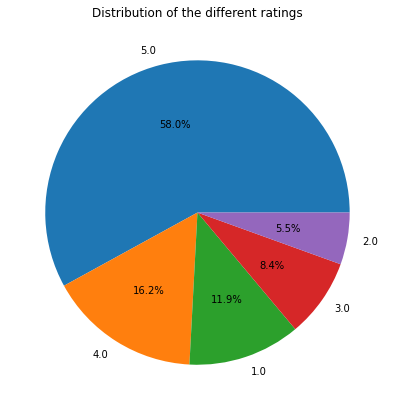

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = merged_df_text['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different ratings")
plt.show()

# 4. MOST USED POSITIVE WORDS FROM A SUBSET OF DATASET

# Ignoring 'Game' which can be treated as a neutral word.

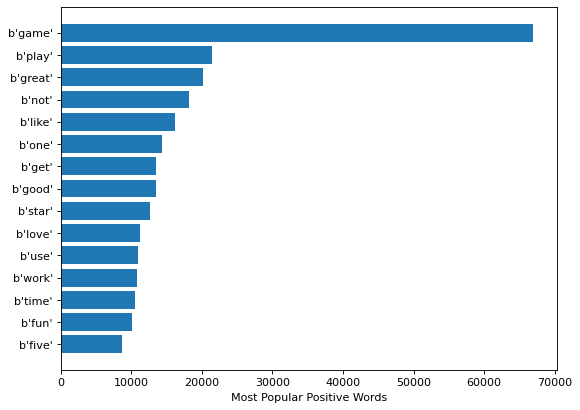

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pos_words = positive.most_common(15)
pos_words.sort(key=lambda x: x[1], reverse=False)
words=[]
times=[]
for w,t in pos_words:
    words.append(w)
    times.append(t)
plt.barh(range(len(words)),times)
plt.yticks(range(len(words)),words)
plt.xlabel('Most Popular Positive Words')
plt.show()

# 5. TRACKING MOST USED NEGATIVE WORDS

# Ignoring 'Game' which can be treated as a neutral word.

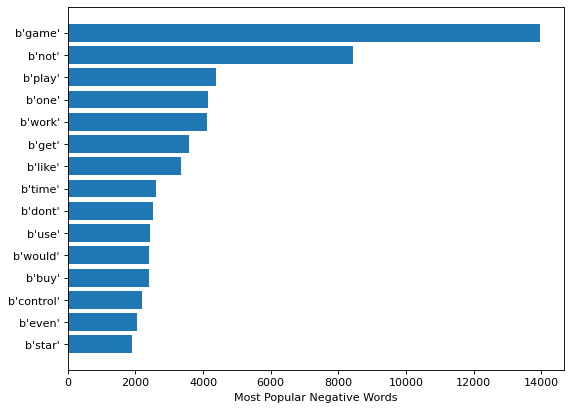

In [ ]:
neg_words = negative.most_common(15)
neg_words.sort(key=lambda x: x[1], reverse=False)
words=[]
times=[]
for w,t in neg_words:
    words.append(w)
    times.append(t)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(range(len(words)),times)
plt.yticks(range(len(words)),words)
plt.xlabel('Most Popular Negative Words')
plt.show()

In [ ]:
merged_df_text_subset['CleanedText']=final_string
merged_df_text_subset.head(5)

,rating,verified,date,reviewerID,product_id,reviewerName,timestamp,category,description,title,brand,feature,rank,also_view,main_cat,Year,review_text,Score,CleanedText
2077794,2.0,True,2018-05-22,A1NXWGHV25J8TD,B00YXO5UI6,Blake L.,1526947200,"[Video Games, Xbox 360, Accessories, Headsets,...",[The Recon 60P gaming headset features Turtle ...,Turtle Beach - Ear Force Recon 60P Amplified S...,by\n \n Turtle Beach,[Amplified Audio Louder is better! Get amazin...,[>#633 in Video Games (See Top 100 in Video Ga...,"[B07D3N7JTY, B07D3NPDL1, B00YXO5V3U, B00KSQAAC...",Video Games,2018,Cheap The headband sits towards the front of y...,Negative,b'classic word process program hard find class...
2243912,5.0,True,2018-03-21,A1EERGA52QKA7K,B019OB663A,mouthbreether,1521590400,"[Video Games, PC, Accessories, Gaming Mice]",[G502 features an advanced optical sensor for ...,Logitech G502 Proteus Spectrum RGB Tunable Gam...,Logitech,[Advanced optical gaming sensor (PMW3366): Log...,[>#1 in Computers & Accessories > Computer Acc...,"[B01LXC1QL0, B00E4MQODC, B00LZVNWIA, B00IRHE89...",Computers,2018,"Seems to be a solid mouse with good features, ...",Positive,b'memoir doom game addict ever sinc play compu...
1899049,5.0,True,2018-01-20,A1N5I2L4MWAGRV,B00N4ABT1C,TheManOfAction,1516406400,"[Video Games, Nintendo 3DS & 2DS, Interactive ...",[Yoshi amiibo],Yoshi amiibo (Super Smash Bros Series),by\n \n Nintendo,[Team up with your amiibo or play against frie...,"[>#7,557 in Video Games (See Top 100 in Video ...","[B00S7O6R62, B00O9GPAVU, B00N4ABMG4, B00O92ONB...",Video Games,2018,Five Stars I loved how this import was cheap a...,Positive,b'five star perfect'
2812988,5.0,True,2018-04-04,A22G2PHUX3NB41,B016MEFRFU,AMAZING,1522800000,"[Video Games, PC, Accessories, Controllers]",[],iNNEXT&reg; SNES Retro USB Super Nintendo Cont...,iNNEXT,[],"[>#42,414 in Video Games (See Top 100 in Video...","[B01N7ANDLC, B002B9XB0E]",Video Games,2018,... controllers seem well built and they have ...,Positive,b'whoo rare drunk shovel knight manag receiv o...
1733676,1.0,False,2018-03-27,A2NQ73SJAC3OLF,B00IRHE892,Brennok,1522108800,"[Video Games, PC, Accessories, Gaming Mice]",[Surface tuning calibration: Easily calibrate ...,Logitech G502 Proteus Core Tunable Gaming Mous...,Logitech,[Surface tuning calibration: Easily calibrate ...,[>#9 in Video Games > Mac Games > Mac Game Har...,"[B019OB663A, B07GBZ4Q68, B01AZC3I6U, B00EWEHI5...",Computers,2018,Avoid the new Logitech products like the plagu...,Negative,b'great movi music horribl onlin game friend c...


# 6. CLASSIFYING ON THE BASIS OF SENTIMENT : BAR GRAPH AND PIE CHART

In [ ]:
import plotly.express as px

fig = px.histogram(merged_df_text_subset, x="Score")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')

fig.show()


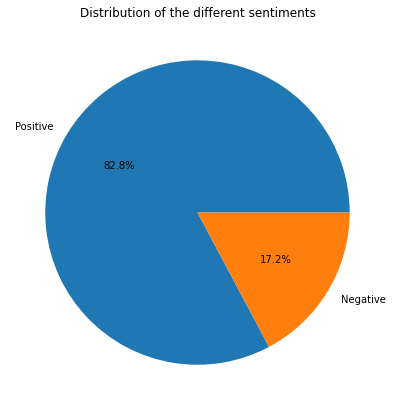

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = merged_df_text_subset['Score'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different sentiments")
plt.show()

# 7. MOST USED WORDS IN THE RANDOMLY SAMPLED SUBSET OF DATASET

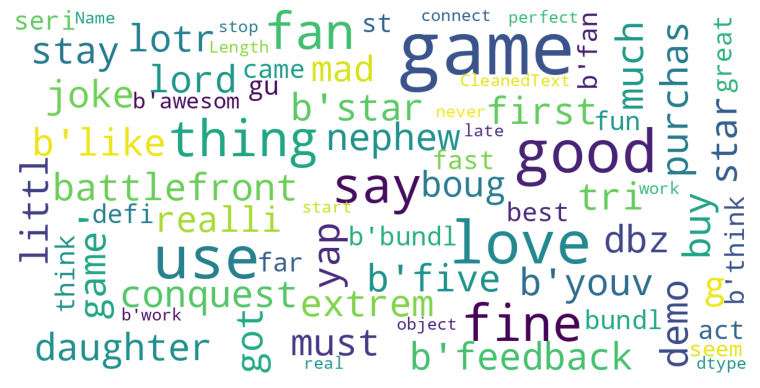

2639310    b'like tri demo first purchas game littl yap g...
1255921                      b'five star daughter love game'
808712     b'star must battlefront lotr fan lord conquest...
958195     b'feedback game good buy nephew like much stay...
1658499    b'silenc hous absolut love headset not hear gi...
                                 ...                        
2323889    b'battlefield potenti battlefield potenti soli...
913785     b'bundl good love game bundl came fast good gu...
1413423    b'fan seri love best far fun game great act st...
1787642    b'think use thing say think use thing say defi...
1136981    b'awesom seem perfect like never use game real...
Name: CleanedText, Length: 41294, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10
plt.rcParams['savefig.dpi']=100             #72
plt.rcParams['figure.subplot.bottom']=.1


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(merged_df_text_subset['CleanedText'])
merged_df_text_subset.loc[merged_df_text_subset['Score'] == 'Positive']['CleanedText']

# 8. WORDCLOUD OF POSITIVE WORDS

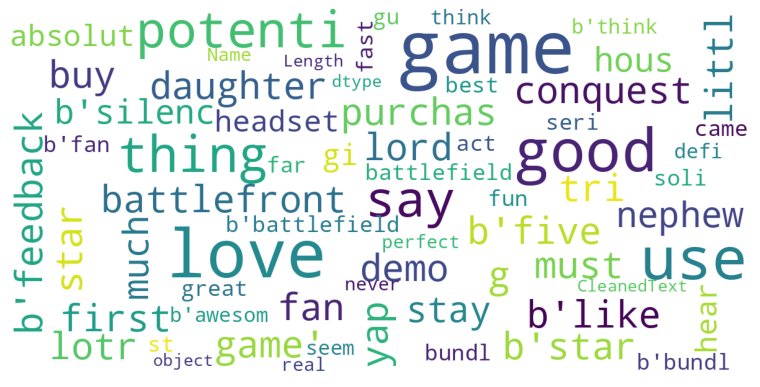

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10
plt.rcParams['savefig.dpi']=100             #72
plt.rcParams['figure.subplot.bottom']=.1


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(merged_df_text_subset.loc[merged_df_text_subset['Score'] == 'Positive']['CleanedText'])

# 9. WORDCLOUD OF NEGATIVE WORDS


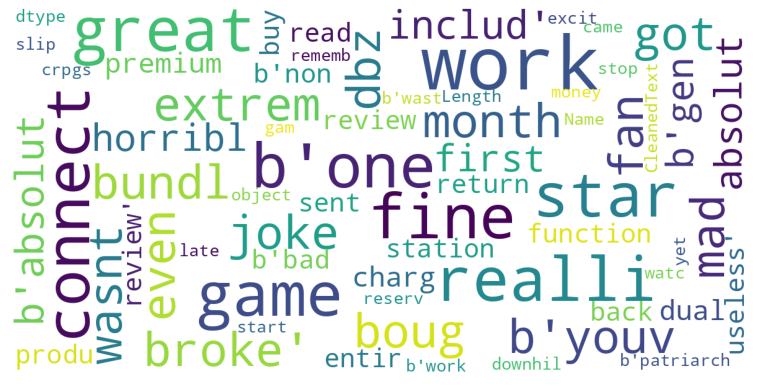

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12
plt.rcParams['savefig.dpi']=100


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(merged_df_text_subset.loc[merged_df_text_subset['Score'] == 'Negative']['CleanedText'])


# 10. PLOTTING CHANGE IN SENTIMENT OVER YEARS

In [ ]:
merged_df_text_subset['Year'] = pd.DatetimeIndex(merged_df_text_subset['date']).year
merged_df_text_subset = merged_df_text_subset.sort_values(by=['Year'],ascending=False)
x= merged_df_text_subset["CleanedText"]
y= merged_df_text_subset["Score"]

In [ ]:
merged_df_text_subset['review_length'] = merged_df_text_subset.CleanedText.str.len()
merged_df_text_subset.head()

,rating,verified,date,reviewerID,product_id,reviewerName,timestamp,category,description,title,brand,feature,rank,also_view,main_cat,Year,review_text,Score,CleanedText,review_length
2077794,2.0,True,2018-05-22,A1NXWGHV25J8TD,B00YXO5UI6,Blake L.,1526947200,"[Video Games, Xbox 360, Accessories, Headsets,...",[The Recon 60P gaming headset features Turtle ...,Turtle Beach - Ear Force Recon 60P Amplified S...,by\n \n Turtle Beach,[Amplified Audio Louder is better! Get amazin...,[>#633 in Video Games (See Top 100 in Video Ga...,"[B07D3N7JTY, B07D3NPDL1, B00YXO5V3U, B00KSQAAC...",Video Games,2018,Cheap The headband sits towards the front of y...,Negative,b'classic word process program hard find class...,455
2464228,1.0,True,2018-04-12,A3BA6HHC8DVQUR,B0000696CZ,Travis,1523491200,"[Video Games, Retro Gaming &amp; Microconsoles...","[Following the success of Grand Theft Auto, de...",Grand Theft Auto Vice City,by\n \n 2K,"[Set in the 80s, Power, glamour, and corruptio...","[>#2,773 in Video Games (See Top 100 in Video ...","[B000KCX9M4, B0001VGFK2, B00006BXBV, B00005O0I...",Video Games,2018,No good I am very dissatisfied with the produc...,Negative,b'classic game classic franchis legend zelda w...,249
2181625,5.0,True,2018-07-01,AW9T0MLXZGWSK,B015PJ68BK,Joe,1530403200,"[Video Games, PC, Accessories, Controllers, Fl...",[The Thrust master Flight Hotas 4 Flight Stick...,Thrustmaster T.Flight Hotas 4 Flight Stick for...,by\n \n ThrustMaster,[Ready for takeoff with adjustable stick resis...,[>#390 in Video Games (See Top 100 in Video Ga...,"[B01MUDTTIP, B001CXYMFS, B07DLKVKD5, B01A0P8NB...",Video Games,2018,Makes Elite Dangerous so much fun. Only works ...,Positive,b'great price purchas control anticip use emul...,384
2844307,5.0,True,2018-01-23,A6V1BE40K9386,B01GKYYQG8,Eric,1516665600,"[Video Games, PlayStation 4, Accessories, Batt...",[Description: <br> Dual Wireless Controller Ch...,Games Accessories Dual USB Charging Charger Do...,by\n \n Benftry,[Dual Wireless Controller Charger - Power thro...,"[>#26,646 in Video Games (See Top 100 in Video...",[],Video Games,2018,"Its pretty cheap, after all it worth this pric...",Positive,b'five star happi',15
2291109,5.0,True,2018-01-28,A1EKTKT00XO147,B01D63UU52,Michael Wojciechoski,1517097600,"[Video Games, PC, Accessories, Gaming Mice]",[The M65 PRO RGB is a competition-grade FPS ga...,"CORSAIR M65 Pro RGB - FPS Gaming Mouse - 12,00...",Corsair,"[12000 DPI high-accuracy sensor: custom tuned,...",[>#4 in Computers & Accessories > Computer Acc...,"[B01APA8D2G, B06Y1712ZY, B07KKZB9LM, B01AZC3I6...",Computers,2018,... I had for a few years (old one was fine be...,Positive,b'five star great product buy seller',34


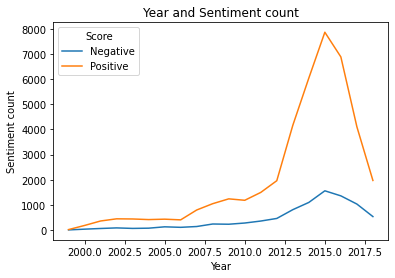

In [ ]:
merged_df_text_subset.groupby(['Year','Score'])['Score'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

# PROJECT PHASE 2 STARTS HERE

IN THIS PHASE WE WILL PERFORM SOME STATISTICAL MODELLING ON OUR PRE-PROCESSED DATASET. SPECIFICALLY, WE WILL BUILD THE FOLLOWING MODELS:


1. K-MEANS CLUSTERING

2. KNN

3. LOGISTIC REGRESSION

4. CNN

5. RNN



In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
svd = TruncatedSVD(n_components=50)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(vectorizer, svd, normalizer)
X = lsa.fit_transform(merged_df_text['review_text'])


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = Parallel(n_jobs=-1)(delayed(kmeans.fit_predict)(X[i:i + 1000]) for i in range(0, len(X), 1000))
labels = np.concatenate(kmeans_labels)

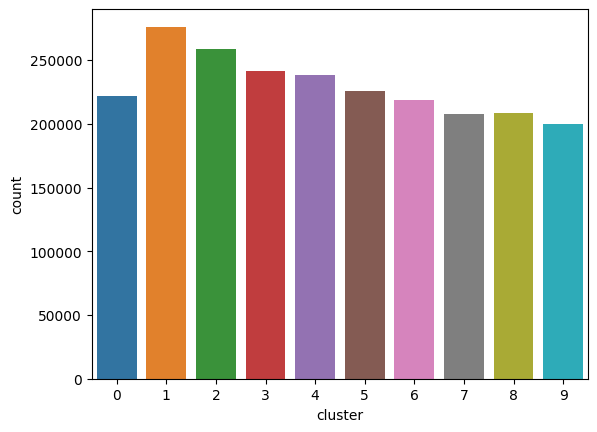

In [ ]:
merged_df_text['cluster'] = labels

# Plot the distribution of reviews across the clusters
sns.countplot(x='cluster', data=merged_df_text)
plt.show()

# KNN

In [ ]:
merged_df_text_copy = merged_df_text_copy.drop(columns=['Unnamed: 0'])
merged_df_text_copy = merged_df_text_copy.dropna(how = 'any')
merged_df_text_copy.head(5)

,rating,verified,date,reviewerID,product_id,reviewerName,timestamp,category,description,title,brand,feature,rank,also_view,main_cat,Year,review_text,Score
0,5,True,2018-04-19,A194UPGR3OXZB7,B01HJEBIAA,Kayla,1524096000,"['Video Games', 'PC', 'Accessories', 'Gaming M...","[""<b>Features and Functions:</b> <br>Quick thu...",Zelotes 4000 DPI Programmable Gaming Mouse for...,Zelotes,"['Customize DPI Switch: 1000/1500/2000/4000,th...",['>#434 in Computers & Accessories > Computer ...,"['B016ZF77OA', 'B00GU8W5AE', 'B00E64DTDQ', 'B0...",Computers,2018,gorgeous durable havent really used much dang ...,Positive
1,5,True,2018-03-28,A36J7O2U32J599,B000PS2XES,Ron S.,1522195200,"['Video Games', 'PC', 'Games', '</span></span>...",['The Orange Box delivers five innovative game...,The Orange Box - PC,by\n \n Valve,['Characters - Advanced facial animation syste...,"['>#22,881 in Video Games (See Top 100 in Vide...","['B00140S21O', 'B000RO0OKU', 'B00006I02Z', 'B0...",Video Games,2018,five star awsome,Positive
2,5,True,2018-04-19,A29I1A248GMTQN,B000PT18OS,L.W,1524096000,"['Video Games', 'Xbox 360', 'Accessories', 'Ca...",['Did you misplace or destroy the AC power ada...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,['AC Power Supply for Microsoft XBOX 360 203W ...,['>#14 in Video Games > Xbox 360 > Accessories...,"['B0181R6WUA', 'B00VDHMRS2', 'B003WM1P5W', 'B0...",Computers,2018,five star great nproduct,Positive
3,1,True,2018-05-07,A1RSZH0WIAWFNC,B000PT18OS,P,1525651200,"['Video Games', 'Xbox 360', 'Accessories', 'Ca...",['Did you misplace or destroy the AC power ada...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,['AC Power Supply for Microsoft XBOX 360 203W ...,['>#14 in Video Games > Xbox 360 > Accessories...,"['B0181R6WUA', 'B00VDHMRS2', 'B003WM1P5W', 'B0...",Computers,2018,stay away usedcracked sell used cracked junk b...,Negative
4,5,True,2018-01-12,A1VYOGOZ97ZMV1,B000PS1HNQ,Cathy Whitehouse,1515715200,"['Video Games', 'PC', 'Games', '</span></span>...",['The Sims 2: Bon Voyage PC CD'],The Sims 2: Bon Voyage - PC CD-Rom (Expansion ...,by\n \n Electronic Arts,['Whisk your Sims away from their everyday rou...,"['>#5,207 in Video Games (See Top 100 in Video...","['B000VSEF52', 'B001AIR1F8', 'B000KQQUMQ', 'B0...",Video Games,2018,five star mom loved,Positive


In [ ]:
merged_df_text_subset = merged_df_text_copy.sample(frac=0.01, random_state=42)

In [ ]:
merged_df_text_subset.shape

(22734, 18)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(merged_df_text_subset['review_text'])
y = merged_df_text_subset['Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.8601275566307456
Precision: 0.8739739256397876
Recall: 0.9694697375468666
F1-score: 0.9192483494159471


In [ ]:
import pickle

filename = 'knn.pkl'
pickle.dump(knn, open(filename,'wb'))

NameError: ignored

# LOGISTIC REGRESSION

In [ ]:
X = merged_df_text_copy['review_text']
y = merged_df_text_copy['Score']

lb = LabelBinarizer()
Y = lb.fit_transform(y)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_LR = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_dim=X_train.shape[1])
])

In [ ]:
model_LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
LR_history = model_LR.fit(X_train, y_train, epochs=5, batch_size=1024, validation_data=(X_test, y_test))

Epoch 1/5
1777/1777 [==============================] - 7s 3ms/step - loss: 0.4661 - accuracy: 0.8205 - val_loss: 0.4565 - val_accuracy: 0.8261
Epoch 2/5
1777/1777 [==============================] - 6s 3ms/step - loss: 0.4568 - accuracy: 0.8245 - val_loss: 0.4555 - val_accuracy: 0.8257
Epoch 3/5
1777/1777 [==============================] - 6s 3ms/step - loss: 0.4568 - accuracy: 0.8245 - val_loss: 0.4554 - val_accuracy: 0.8255
Epoch 4/5
1777/1777 [==============================] - 5s 3ms/step - loss: 0.4568 - accuracy: 0.8245 - val_loss: 0.4564 - val_accuracy: 0.8259
Epoch 5/5
1777/1777 [==============================] - 5s 3ms/step - loss: 0.4567 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8231


In [ ]:
Y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

In [ ]:
accuracy = accuracy_score(y_test, Y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9381820581055225


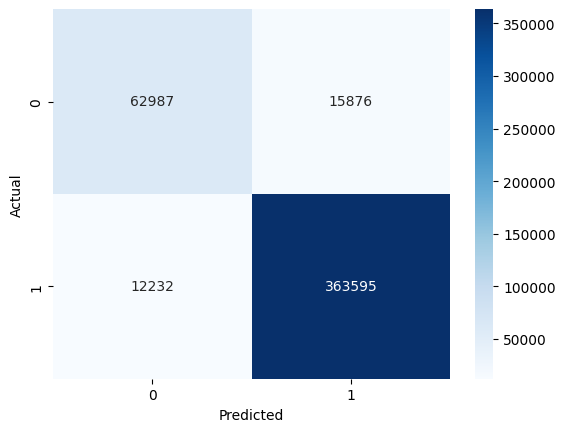

In [ ]:
cm = confusion_matrix(y_test, Y_pred_binary.round())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

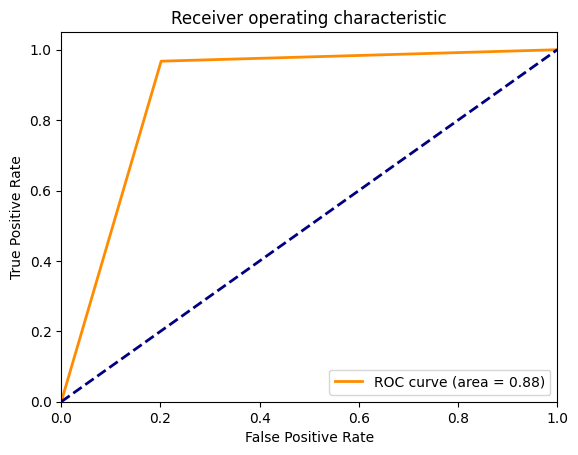

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

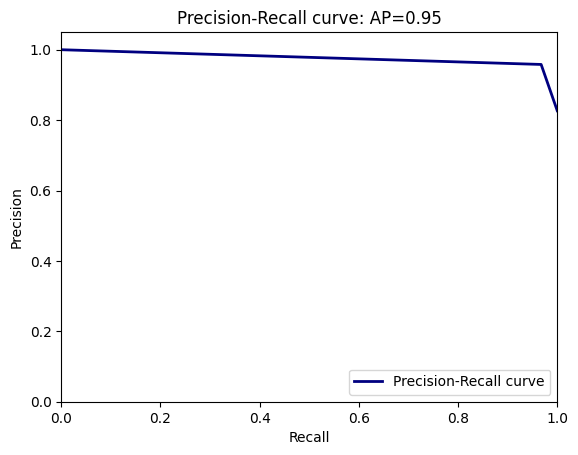

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, Y_pred_binary)

average_precision = average_precision_score(y_test, Y_pred_binary)
plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower right")
plt.show()

# CONVOLUTIONAL NEURAL NETWORKS

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import roc_curve, auc

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [ ]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    words = nltk.word_tokenize(text)

    words = [word for word in words if word not in stop_words]

    words = [lemmatizer.lemmatize(word) for word in words]

    text = ' '.join(words)
    return text

In [ ]:
#merged_df_text_copy['review_text'] = merged_df_text_copy['review_text'].apply(preprocess_text)

In [ ]:
#!unzip /content/gdrive/MyDrive/Colab_data/preprocess.csv.zip -d /content/gdrive/MyDrive/Colab_data/

Archive:  /content/gdrive/MyDrive/Colab_data/preprocess.csv.zip
  inflating: /content/gdrive/MyDrive/Colab_data/preprocess.csv  


In [ ]:
merged_df_text_copy = pd.read_csv('/content/gdrive/MyDrive/Colab_data/preprocess.csv', index_col = False)

In [ ]:
merged_df_text_copy = merged_df_text_copy.drop(columns=['Unnamed: 0'])
merged_df_text_copy = merged_df_text_copy.dropna(how = 'any')
merged_df_text_copy.head(5)

,rating,verified,date,reviewerID,product_id,reviewerName,timestamp,category,description,title,brand,feature,rank,also_view,main_cat,Year,review_text,Score
0,5,True,2018-04-19,A194UPGR3OXZB7,B01HJEBIAA,Kayla,1524096000,"['Video Games', 'PC', 'Accessories', 'Gaming M...","[""<b>Features and Functions:</b> <br>Quick thu...",Zelotes 4000 DPI Programmable Gaming Mouse for...,Zelotes,"['Customize DPI Switch: 1000/1500/2000/4000,th...",['>#434 in Computers & Accessories > Computer ...,"['B016ZF77OA', 'B00GU8W5AE', 'B00E64DTDQ', 'B0...",Computers,2018,gorgeous durable havent really used much dang ...,Positive
1,5,True,2018-03-28,A36J7O2U32J599,B000PS2XES,Ron S.,1522195200,"['Video Games', 'PC', 'Games', '</span></span>...",['The Orange Box delivers five innovative game...,The Orange Box - PC,by\n \n Valve,['Characters - Advanced facial animation syste...,"['>#22,881 in Video Games (See Top 100 in Vide...","['B00140S21O', 'B000RO0OKU', 'B00006I02Z', 'B0...",Video Games,2018,five star awsome,Positive
2,5,True,2018-04-19,A29I1A248GMTQN,B000PT18OS,L.W,1524096000,"['Video Games', 'Xbox 360', 'Accessories', 'Ca...",['Did you misplace or destroy the AC power ada...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,['AC Power Supply for Microsoft XBOX 360 203W ...,['>#14 in Video Games > Xbox 360 > Accessories...,"['B0181R6WUA', 'B00VDHMRS2', 'B003WM1P5W', 'B0...",Computers,2018,five star great nproduct,Positive
3,1,True,2018-05-07,A1RSZH0WIAWFNC,B000PT18OS,P,1525651200,"['Video Games', 'Xbox 360', 'Accessories', 'Ca...",['Did you misplace or destroy the AC power ada...,Microsoft Original Power Supply 203W AC Adapte...,HongLei,['AC Power Supply for Microsoft XBOX 360 203W ...,['>#14 in Video Games > Xbox 360 > Accessories...,"['B0181R6WUA', 'B00VDHMRS2', 'B003WM1P5W', 'B0...",Computers,2018,stay away usedcracked sell used cracked junk b...,Negative
4,5,True,2018-01-12,A1VYOGOZ97ZMV1,B000PS1HNQ,Cathy Whitehouse,1515715200,"['Video Games', 'PC', 'Games', '</span></span>...",['The Sims 2: Bon Voyage PC CD'],The Sims 2: Bon Voyage - PC CD-Rom (Expansion ...,by\n \n Electronic Arts,['Whisk your Sims away from their everyday rou...,"['>#5,207 in Video Games (See Top 100 in Video...","['B000VSEF52', 'B001AIR1F8', 'B000KQQUMQ', 'B0...",Video Games,2018,five star mom loved,Positive


In [ ]:
X = merged_df_text_copy['review_text'].values
Y = merged_df_text_copy['Score'].values
lb = LabelBinarizer()
Y = lb.fit_transform(Y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:
X_train.shape

(1818758,)

In [ ]:
max_features = 20000
max_text_length = 500

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_text_length)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_text_length)

In [ ]:
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 64),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
CNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 1024
epochs = 5

history = CNN_model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/5
1777/1777 [==============================] - 175s 96ms/step - loss: 0.1683 - accuracy: 0.9318 - val_loss: 0.1545 - val_accuracy: 0.9367
Epoch 2/5
1777/1777 [==============================] - 66s 37ms/step - loss: 0.1376 - accuracy: 0.9436 - val_loss: 0.1444 - val_accuracy: 0.9401
Epoch 3/5
1777/1777 [==============================] - 52s 29ms/step - loss: 0.1247 - accuracy: 0.9491 - val_loss: 0.1453 - val_accuracy: 0.9403
Epoch 4/5
1777/1777 [==============================] - 46s 26ms/step - loss: 0.1107 - accuracy: 0.9554 - val_loss: 0.1518 - val_accuracy: 0.9397
Epoch 5/5
1777/1777 [==============================] - 42s 24ms/step - loss: 0.0956 - accuracy: 0.9622 - val_loss: 0.1697 - val_accuracy: 0.9382


In [ ]:
score, accuracy = CNN_model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Test score:', score)
print('Test accuracy:', accuracy)

445/445 [==============================] - 3s 6ms/step - loss: 0.1697 - accuracy: 0.9382
Test score: 0.16973327100276947
Test accuracy: 0.9381798505783081


In [ ]:
y_pred = CNN_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)


print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

14210/14210 [==============================] - 47s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454690

    accuracy                           1.00    454690
   macro avg       1.00      1.00      1.00    454690
weighted avg       1.00      1.00      1.00    454690



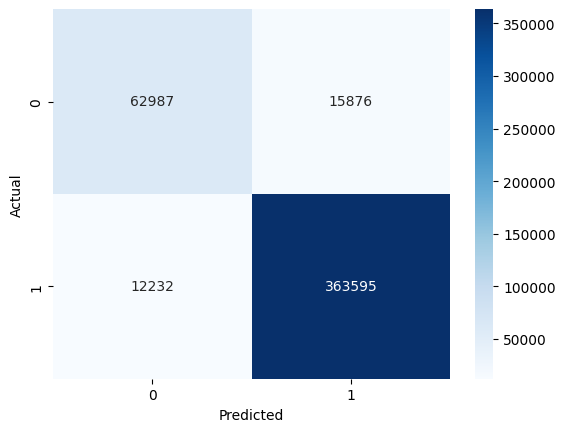

In [ ]:
cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

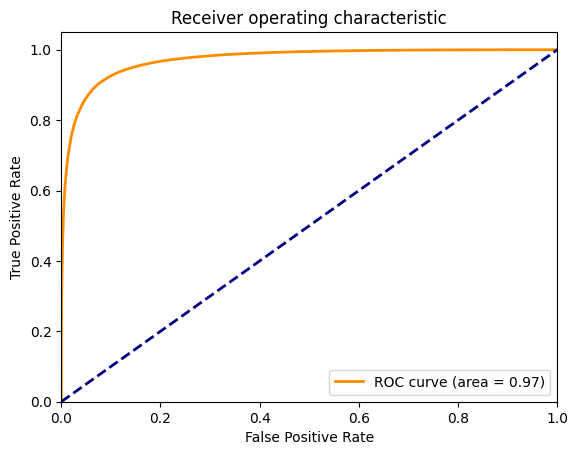

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

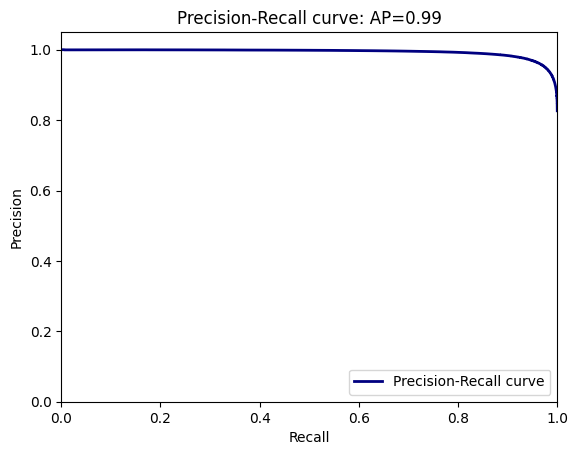

In [ ]:
precision, recall, _ = precision_recall_curve(Y_test, y_pred)

average_precision = average_precision_score(Y_test, y_pred)
plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower right")
plt.show()

RNN

In [ ]:
RNN_model = Sequential()
RNN_model.add(Embedding(10000, 32))
RNN_model.add(LSTM(32))
RNN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
RNN_history = RNN_model.fit(X_train, Y_train, epochs=1, validation_data=(X_test, Y_test), verbose=1)

56837/56837 [==============================] - 1017s 18ms/step - loss: 0.1396 - accuracy: 0.9429 - val_loss: 0.1437 - val_accuracy: 0.9407


In [ ]:
Y_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
Y_pred = RNN_model.predict(X_test)


14210/14210 [==============================] - 101s 7ms/step


In [ ]:
Y_pred_binary = np.where(Y_pred >= 0.5, 1, 0)

In [ ]:
print('Accuracy:', accuracy_score(Y_test, Y_pred_binary))
print('Classification Report:\n', classification_report(Y_test, Y_pred_binary))

Accuracy: 0.940673865710704
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82     78863
           1       0.95      0.98      0.96    375827

    accuracy                           0.94    454690
   macro avg       0.91      0.87      0.89    454690
weighted avg       0.94      0.94      0.94    454690



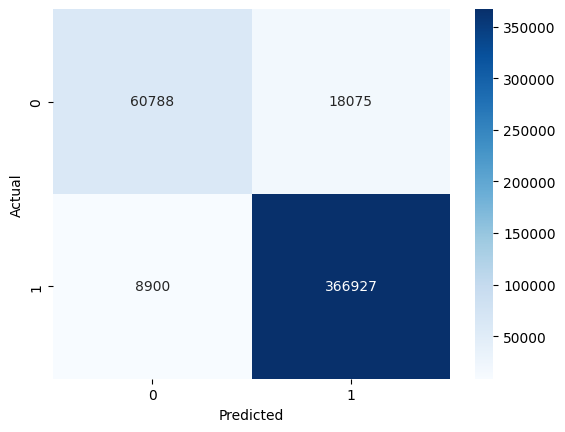

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_binary.round())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

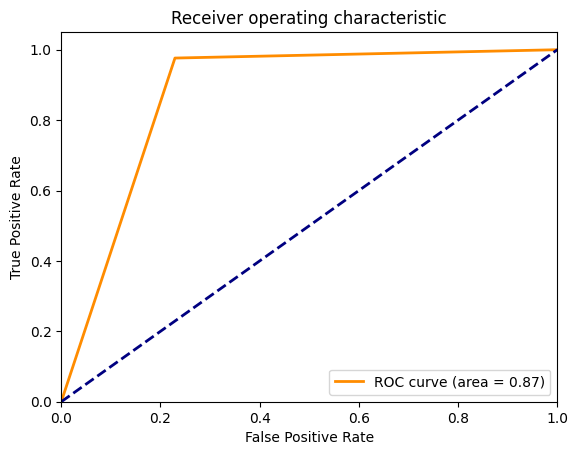

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred_binary )
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

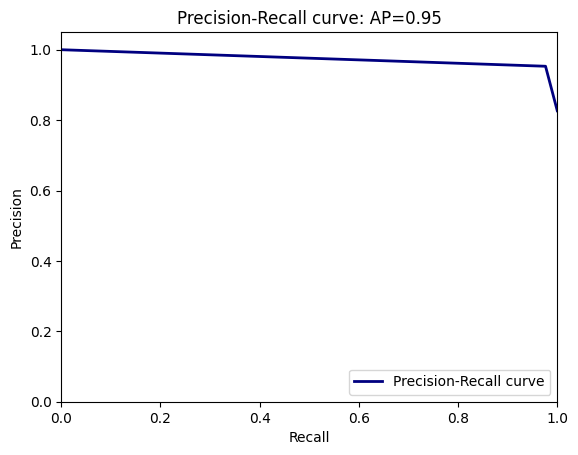

In [ ]:
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_binary)

average_precision = average_precision_score(Y_test, Y_pred_binary)
plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower right")
plt.show()